### IMPORTING REQUIRED LIBRARIES

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

#### READING THE DATA

In [38]:
df=pd.read_csv("D:/POP.csv")

In [4]:
df.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


In [10]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   realtime_start  816 non-null    object 
 1   value           816 non-null    float64
 2   date            816 non-null    object 
 3   realtime_end    816 non-null    object 
dtypes: float64(1), object(3)
memory usage: 25.6+ KB


(816, 4)

In [39]:
df.isnull().sum()

realtime_start    0
value             0
date              0
realtime_end      0
dtype: int64

In [7]:
df["date"].head()

0    1952-01-01
1    1952-02-01
2    1952-03-01
3    1952-04-01
4    1952-05-01
Name: date, dtype: object

In [8]:
df["date"].describe()

count            816
unique           816
top       1994-06-01
freq               1
Name: date, dtype: object

In [41]:
df['Date'] = pd.to_datetime(df['date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   realtime_start  816 non-null    object        
 1   value           816 non-null    float64       
 2   date            816 non-null    object        
 3   realtime_end    816 non-null    object        
 4   Date            816 non-null    datetime64[ns]
 5   year            816 non-null    int64         
 6   month           816 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 44.8+ KB


In [42]:
#Indexing data with Order_Date
df = df.set_index('Date')
df.head()


,realtime_start,value,date,realtime_end,year,month
Date,,,,,,
1952-01-01,2019-12-06,156309.0,1952-01-01,2019-12-06,1952,1
1952-02-01,2019-12-06,156527.0,1952-02-01,2019-12-06,1952,2
1952-03-01,2019-12-06,156731.0,1952-03-01,2019-12-06,1952,3
1952-04-01,2019-12-06,156943.0,1952-04-01,2019-12-06,1952,4
1952-05-01,2019-12-06,157140.0,1952-05-01,2019-12-06,1952,5


In [16]:
df["value"].describe()

count       816.000000
mean     243847.767826
std       50519.140567
min      156309.000000
25%      201725.250000
50%      239557.500000
75%      289364.250000
max      330309.946000
Name: value, dtype: float64

<AxesSubplot:ylabel='Frequency'>

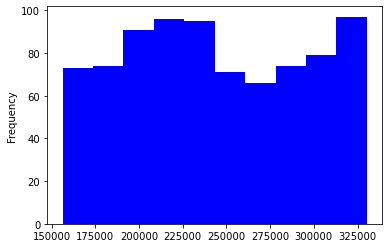

In [21]:
df["value"].plot(kind='hist',facecolor="blue")

In [22]:
df.groupby("year")["value"].describe()
        

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1952,12.0,157492.583333,794.979526,156309.000,156890.00000,157448.0000,158116.25000,158757.000
1953,12.0,160146.166667,825.147572,158973.000,159504.25000,160070.0000,160783.00000,161453.000
1954,12.0,162968.250000,878.229327,161690.000,162293.50000,162908.0000,163639.25000,164349.000
1955,12.0,165872.333333,885.138236,164588.000,165192.75000,165813.0000,166543.50000,167270.000
1956,12.0,168857.666667,923.430101,167513.000,168160.00000,168781.0000,169561.00000,170315.000
...,...,...,...,...,...,...,...,...
2015,12.0,320929.533083,712.866906,319928.646,320359.41775,320875.8855,321483.96300,322043.071
2016,12.0,323224.626667,686.074953,322232.862,322678.77600,323189.7540,323762.31975,324274.912
2017,12.0,325326.015500,627.248783,324438.195,324824.81025,325276.9245,325816.00225,326301.399


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 1952-01-01 to 2019-12-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   realtime_start  816 non-null    object 
 1   value           816 non-null    float64
 2   realtime_end    816 non-null    object 
 3   year            816 non-null    int64  
 4   month           816 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 38.2+ KB


In [43]:
df=df.drop(["realtime_start","realtime_end",'year',"month"],axis=1)

In [45]:
df=df.drop(["date"],axis=1)

In [46]:
df.head()

,value
Date,
1952-01-01,156309.0
1952-02-01,156527.0
1952-03-01,156731.0
1952-04-01,156943.0
1952-05-01,157140.0


In [28]:
df.describe()

,value
count,816.000000
mean,243847.767826
std,50519.140567
min,156309.000000
25%,201725.250000
50%,239557.500000
75%,289364.250000
max,330309.946000


#### LINE PLOT OF ORIGINAL DATA

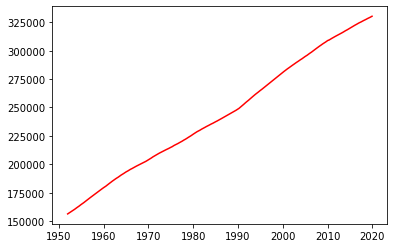

In [29]:
plt.plot(df,"r")

Text(0.5, 1.0, 'Histogram of orginal data')

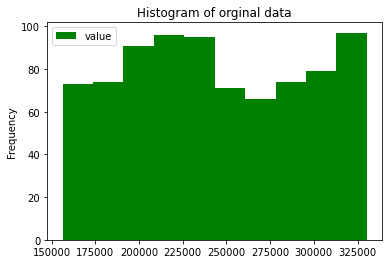

In [146]:
df.plot(kind='hist',facecolor="green")
plt.title("Histogram of orginal data")

<AxesSubplot:ylabel='Density'>

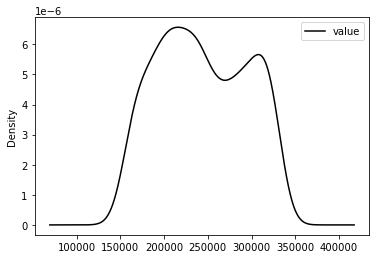

In [31]:
df.plot(kind='kde',color="black")

<AxesSubplot:>

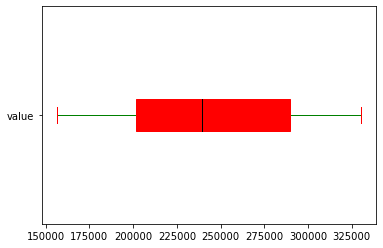

In [35]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df["value"].plot.box(color=props2, patch_artist = True, vert = False) #Outliers

#### DECOMPOSING THE TIME SERIES

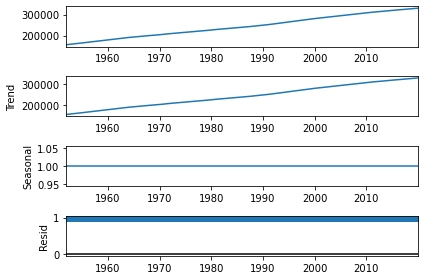

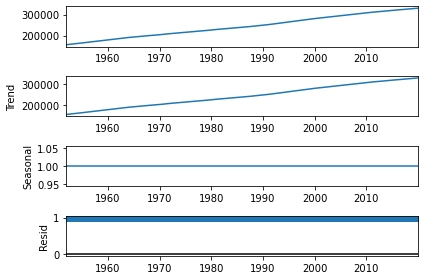

In [47]:
df_decomp_mul=seasonal_decompose(df,period=1,model="mul")
df_decomp_mul.plot()

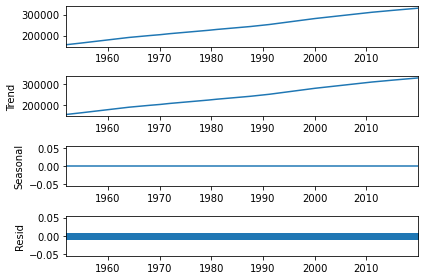

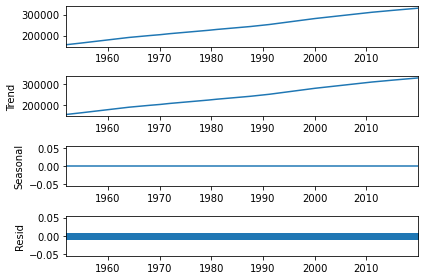

In [48]:
df_decomp_mul=seasonal_decompose(df,period=1,model="additive")
df_decomp_mul.plot()

#### From the above decomposition we can observe that there is no trend and seasonality in the data

#### MOVING AVERAGE METHOD

In [100]:
dfMA = df.rolling(window=12).mean()

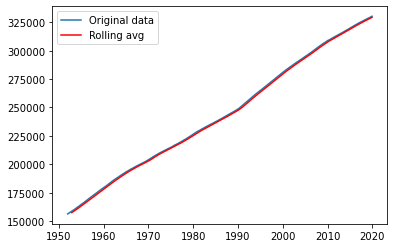

In [136]:
plt.plot(df,label='Original data')
plt.plot(dfMA,color='red',label='Rolling avg')
plt.legend(loc='best')
plt.show()


##### RESIDUALS

In [101]:
df_ma_res = df - dfMA
df_ma_res.head()

,value
Date,
1952-01-01,NaN
1952-02-01,NaN
1952-03-01,NaN
1952-04-01,NaN
1952-05-01,NaN


In [137]:
df_ma_res=df_ma_res.dropna()
df_ma_res.head()

,value
Date,
1952-12-01,1264.416667
1953-01-01,1258.416667
1953-02-01,1235.166667
1953-03-01,1196.000000
1953-04-01,1185.250000


Text(0.5, 1.0, 'Line plot of Residuals')

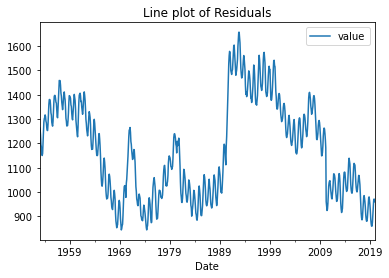

In [138]:
#Lineplot
df_ma_res.plot()
plt.title('Line plot of Residuals')

Text(0.5, 1.0, 'Histogram of residuals')

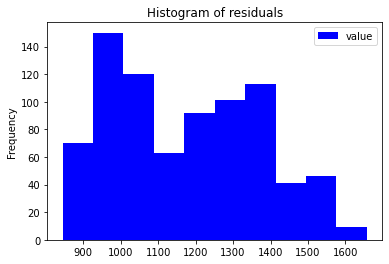

In [148]:
df_ma_res.plot(kind='hist',facecolor="blue")
plt.title("Histogram of residuals")

In [140]:
#squaring residuals/errors
df_ma_res_se=pow(df_ma_res,2)
print(df_ma_res_se.head())

#mean of squared errors
df_ma_res_mse=df_ma_res_se.sum()/len(df_ma_res_se)
print("mse: ",df_ma_res_mse)

df_ma_res_rmse=sqrt(df_ma_res_mse)
print("rmse: ",df_ma_res_rmse)

                   value
Date                    
1952-12-01  1.598750e+06
1953-01-01  1.583613e+06
1953-02-01  1.525637e+06
1953-03-01  1.430416e+06
1953-04-01  1.404818e+06
mse:  value    1.420047e+06
dtype: float64
rmse:  1191.6573770309592


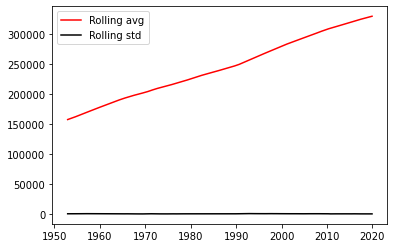

In [59]:
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()

plt.plot(rolmean,color='red',label='Rolling avg')
plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.show()

#### STATIONARITY TEST

In [107]:
df_adf=adfuller(df,autolag='AIC')

In [60]:
print('ADF Statistic: %f' % df_adf[0])
print('p-value: %f' % df_adf[1])
print('Critical Values:')
for key, value in df_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.665317
p-value: 0.855530
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


#### p-value: 0.85 ie > 0.05, Null Hypothesis is accepted, so, Data is not stationary
H0 data is not stationary

### AUTO ARIMA

In [141]:
from pmdarima import auto_arima


In [142]:
df_mod=auto_arima(df)
df_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  816
Model:               SARIMAX(2, 2, 3)   Log Likelihood               -3422.130
Date:                Mon, 06 Sep 2021   AIC                           6856.261
Time:                        14:44:37   BIC                           6884.473
Sample:                             0   HQIC                          6867.090
                                - 816                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7297      0.002   1149.421      0.000       1.727       1.733
ar.L2         -0.9972      0.002   -663.657      0.000      -1.000      -0.994
ma.L1         -2.3858      0.019   -126.359      0.000      -2.423      -2.349
ma.L2          2.1092      0.034     62.523      0.000       2.043       2.175
ma.L3         -0.6399      0.018    -34.610      0.000      -0.676      -0.604
sigma2       257.3583      4.395     58.556      0.000     248.744     265.972
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):             64272.39
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -2.21
Prob(H) (two-sided):                  0.67   Kurtosis:                        46.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [143]:
df_RES = pd.DataFrame(df_mod.resid(), index=df.index)
df_RES 

,0
Date,
1952-01-01,156309.000000
1952-02-01,-77941.097715
1952-03-01,-35.780421
1952-04-01,-2.581753
1952-05-01,-15.299834
...,...
2019-08-01,5.239288
2019-09-01,-1.659436
2019-10-01,4.767596


Text(0.5, 1.0, 'Histogram of Residuals')

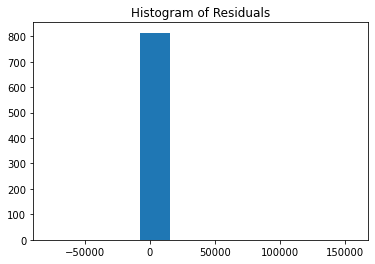

In [144]:
#Histogram of residuals
plt.hist(df_res)
plt.title('Histogram of Residuals')

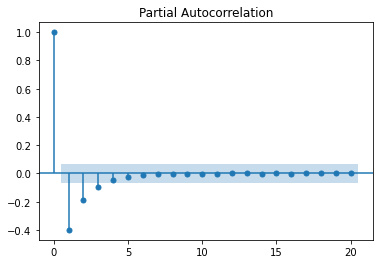

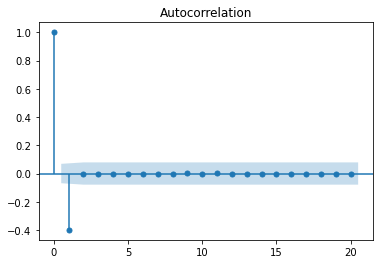

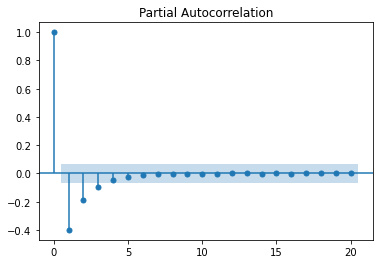

In [84]:
#Plotting acf & pacf for residuals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(df_RES, lags=20) 
plot_pacf(df_RES, lags=20)

In [145]:
#squaring residuals/errors
df_RES_se=pow(df_RES,2)
print(df_RES_se.head())

#mean of squared errors
df_RES_mse=df_RES_se.sum()/len(df_RES_se)
print("mse: ",df_RES_mse)

df_RES_rmse=sqrt(df_RES_mse)
print("rmse: ",df_RES_rmse)

                       0
Date                    
1952-01-01  2.443250e+10
1952-02-01  6.074815e+09
1952-03-01  1.280239e+03
1952-04-01  6.665449e+00
1952-05-01  2.340849e+02
mse:  0    3.738668e+07
dtype: float64
rmse:  6114.465213428048


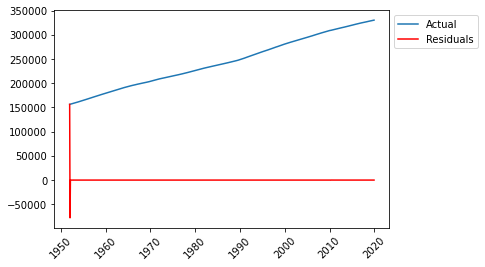

In [133]:
#Plot comparision Actual, Model Values & Residuals
plt.plot(df)
plt.plot(df_RES, 'r')
plt.legend(['Actual', 'Residuals'],
           bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=45)
plt.show()


In [117]:
#Predict
df_pred = df_mod.predict(n_periods=121) 
df_pred = pd.DataFrame(df_pred, 
                             index=pd.date_range(start='2020-01-01',end='2030-01-01', freq='MS'))


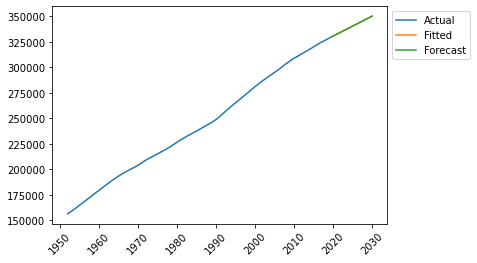

In [128]:
#Plot comparision Actual, Model Values & Forecast
plt.plot(df)
plt.plot(df_mod_v)
plt.plot(df_pred)
plt.legend(['Actual', "Fitted",'Forecast'],
           bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=45)
plt.show()

## This model clearly fits very well in the timeseries and gets the prediction for the next 10 years from 2020-01-01.

##### POPULATION FORECAST FOR 10 YEARS 

In [135]:
df_pred

,0
2020-01-01,330458.039433
2020-02-01,330596.770909
2020-03-01,330732.699954
2020-04-01,330873.117157
2020-05-01,331024.092121
...,...
2029-09-01,349362.668574
2029-10-01,349545.341002
2029-11-01,349719.122934
2029-12-01,349881.197763
